In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\jseme\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\jseme\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Constants
N = 38005238
r_0 = 2.1
gamma = 1/14
beta = gamma*r_0
sigma = 1/5

In [3]:
#Dataframe declaration with initial values
df = pd.DataFrame(index=np.linspace(1,365, 365).astype(int), columns=["S","S'","E","E'","I","I'","R","R'"])
df.loc[1, 'E'] = 691
df.loc[1, 'I'] = 20
df.loc[1, 'R'] = 0
df.loc[1, 'S'] = N-df.loc[1, 'E']-df.loc[1, 'I']-df.loc[1, 'R']
df.head()

,S,S',E,E',I,I',R,R'
1,38004527,NaN,691,NaN,20,NaN,0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Difference in days t_n-t_n-1=1
step_size = 1

#Populate dataframe using Euler's method
for index, row in df.iterrows():

    #S' from system
    df.loc[index, "S'"] = int(-beta/N*df.loc[index,'I']*df.loc[index, 'S'])
    #Using Euler's method with step size of S' over one day (multiplied by one)
    df.loc[index+1, 'S'] = df.loc[index, 'S']+df.loc[index, "S'"]*step_size

    #R' from system
    df.loc[index, "R'"] = int(gamma*df.loc[index, 'I'])
    #Using Euler's method
    df.loc[index+1, 'R'] = df.loc[index, 'R']+df.loc[index, "R'"]*step_size

    #E' from system
    df.loc[index, "E'"] = int(beta/N*df.loc[index,'I']*df.loc[index, 'S']-sigma*df.loc[index, 'E'])
    #Using Euler's method
    df.loc[index+1, 'E'] = df.loc[index, 'E']+df.loc[index, "E'"]*step_size

    #I' from system
    df.loc[index, "I'"] = (int)(sigma*df.loc[index, 'E']-gamma*df.loc[index, 'I'])
    #Using Euler's method
    df.loc[index+1, 'I'] = df.loc[index, 'I']+df.loc[index, "I'"]*step_size

    if (index==df.shape[0]-1):
        break

df.to_csv('seir_eulersdata.csv',index_label="Day")
df.head()

,S,S',E,E',I,I',R,R'
1,38004527,-2,691,-135,20,136,0,1
2,38004525,-23,556,-87,156,100,1,11
3,38004502,-38,469,-55,256,75,12,18
4,38004464,-49,414,-33,331,59,30,23
5,38004415,-58,381,-17,390,48,53,27


In [5]:
#Copy over results and format to seaborn specifications
plotdf = df.loc[:,['S','E','I','R']]
plotdf['day'] = df.index
plotdf = plotdf.melt('day',var_name='Letter',value_name='Value')
plotdf['Value'] = plotdf['Value'].astype(int)
plotdf.head()

,day,Letter,Value
0,1,S,38004527
1,2,S,38004525
2,3,S,38004502
3,4,S,38004464
4,5,S,38004415


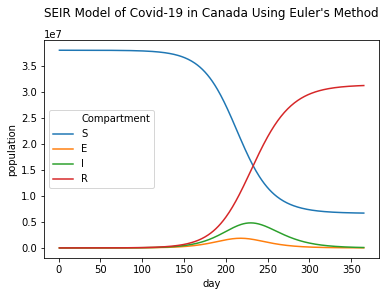

In [6]:
#Plot seaborn
fig, ax = plt.subplots()

ax = sns.lineplot(data=plotdf, x='day', y='Value', hue='Letter')

ax.set_title("SEIR Model of Covid-19 in Canada Using Euler's Method",y=1.08)
ax.set_ylabel('population')
ax.legend().texts[0].set_text("Compartment")
fig.savefig('seir_eulers.png')